In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
from sklearn.preprocessing import OneHotEncoder

# 1. 构建异或数据集

In [2]:
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c 

In [3]:
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))

  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y   

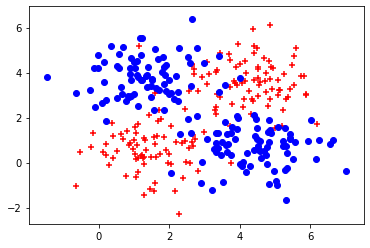

In [4]:
np.random.seed(10)

input_dim = 2
num_classes =4 
X, Y = generate(320,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
Y=Y%2
#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

plt.show() 

# 2. 欠拟合

__将隐藏层的节点设置为２，观察欠拟合现象__

In [10]:
Y=np.reshape(Y,[-1,1])

learning_rate = 1e-4
n_input  = 2
n_label  = 1
n_hidden = 2


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)
 
loss=tf.reduce_mean((y_pred-y)**2)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):#  
  
    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

    if i % 1000 == 0:
        print ("Step:", i, "Current loss:", loss_val)

/home/hu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Current loss: 0.5002737
Step: 1000 Current loss: 0.3092032
Step: 2000 Current loss: 0.26608834
Step: 3000 Current loss: 0.2588339
Step: 4000 Current loss: 0.25047427
Step: 5000 Current loss: 0.23999207
Step: 6000 Current loss: 0.22999123
Step: 7000 Current loss: 0.22000726
Step: 8000 Current loss: 0.2089509
Step: 9000 Current loss: 0.19714156
Step: 10000 Current loss: 0.1853442
Step: 11000 Current loss: 0.17420265
Step: 12000 Current loss: 0.16430512
Step: 13000 Current loss: 0.15591848
Step: 14000 Current loss: 0.14913118
Step: 15000 Current loss: 0.143893
Step: 16000 Current loss: 0.1401511
Step: 17000 Current loss: 0.1377766
Step: 18000 Current loss: 0.13620724
Step: 19000 Current loss: 0.13552961


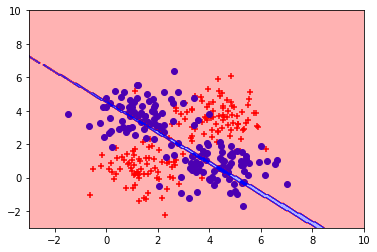

In [11]:
xTrain, yTrain = generate(120, num_classes, [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
yTrain = yTrain % 2
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

    
nb_of_xs = 200
xs1 = np.linspace(-3, 10, num=nb_of_xs)
xs2 = np.linspace(-3, 10, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 

__欠拟合的模型在训练结束时仍有较大的loss值，且可视化结果显示未将数据分开__

# 3. 过拟合

__将隐藏层的节点设置为200，观察欠拟合现象__

In [16]:
Y=np.reshape(Y,[-1,1])

learning_rate = 1e-4
n_input  = 2
n_label  = 1
n_hidden = 200


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)

    
loss=tf.reduce_mean((y_pred-y)**2)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):#  
  
    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

    if i % 1000 == 0:
        print ("Step:", i, "Current loss:", loss_val)

Step: 0 Current loss: 0.49216872
Step: 1000 Current loss: 0.103241585
Step: 2000 Current loss: 0.086104855
Step: 3000 Current loss: 0.07639762
Step: 4000 Current loss: 0.070540786
Step: 5000 Current loss: 0.06748053
Step: 6000 Current loss: 0.06602784
Step: 7000 Current loss: 0.06508948
Step: 8000 Current loss: 0.064103924
Step: 9000 Current loss: 0.062429942
Step: 10000 Current loss: 0.060717117
Step: 11000 Current loss: 0.05889206
Step: 12000 Current loss: 0.057069194
Step: 13000 Current loss: 0.055496626
Step: 14000 Current loss: 0.054085635
Step: 15000 Current loss: 0.052753646
Step: 16000 Current loss: 0.051509757
Step: 17000 Current loss: 0.05033656
Step: 18000 Current loss: 0.04859642
Step: 19000 Current loss: 0.04732693


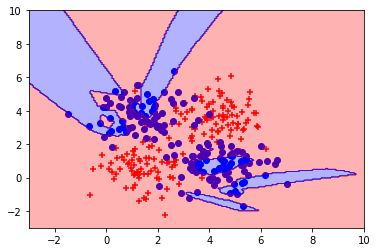

In [17]:
xTrain, yTrain = generate(120, num_classes, [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
yTrain = yTrain % 2
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

    
nb_of_xs = 200
xs1 = np.linspace(-3, 10, num=nb_of_xs)
xs2 = np.linspace(-3, 10, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 

__过拟合的模型虽然降低loss值，但是可视化结果显分类器不具备通用性__

# ４. 正则化改善过拟合

__将原本的loss函数替换为l2_loss，实现正则化，以防止过拟合的发生__

In [18]:
Y=np.reshape(Y,[-1,1])

learning_rate = 1e-4
n_input  = 2
n_label  = 1
n_hidden = 200


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)
 
    
# 正则化设定
reg = 0.01 # l2_loss参数
loss = tf.reduce_mean((y_pred-y)**2) + tf.nn.l2_loss(weights['h1']) * reg + tf.nn.l2_loss(weights['h2']) * reg

train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):#  
  
    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

    if i % 1000 == 0:
        print ("Step:", i, "Current loss:", loss_val)

Step: 0 Current loss: 0.5327763
Step: 1000 Current loss: 0.12612617
Step: 2000 Current loss: 0.110553496
Step: 3000 Current loss: 0.10293923
Step: 4000 Current loss: 0.0986349
Step: 5000 Current loss: 0.09595652
Step: 6000 Current loss: 0.09455784
Step: 7000 Current loss: 0.09390172
Step: 8000 Current loss: 0.09359958
Step: 9000 Current loss: 0.09343478
Step: 10000 Current loss: 0.09332598
Step: 11000 Current loss: 0.09325661
Step: 12000 Current loss: 0.09321325
Step: 13000 Current loss: 0.09318638
Step: 14000 Current loss: 0.09316942
Step: 15000 Current loss: 0.093158275
Step: 16000 Current loss: 0.09315067
Step: 17000 Current loss: 0.09314504
Step: 18000 Current loss: 0.093141496
Step: 19000 Current loss: 0.09313891


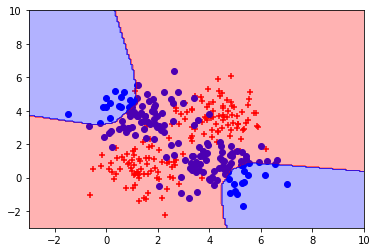

In [19]:
xTrain, yTrain = generate(120, num_classes, [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
yTrain = yTrain % 2
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

    
nb_of_xs = 200
xs1 = np.linspace(-3, 10, num=nb_of_xs)
xs2 = np.linspace(-3, 10, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 

# 5. 增大数据集改善过拟合

__在训练时随机取数据集进行训练（相当于增大数据集，从而改善过拟合）__

In [22]:
Y=np.reshape(Y,[-1,1])

learning_rate = 1e-4
n_input  = 2
n_label  = 1
n_hidden = 200


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)

    
# 正则化设定
reg = 0.01 # l2_loss参数
loss = tf.reduce_mean((y_pred-y)**2) + tf.nn.l2_loss(weights['h1']) * reg + tf.nn.l2_loss(weights['h2']) * reg

train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):# 
    
    X, Y = generate(1000, num_classes, [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
    Y = Y % 2
    Y = np.reshape(Y, [-1, 1])
  
    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

    if i % 1000 == 0:
        print ("Step:", i, "Current loss:", loss_val)

Step: 0 Current loss: 0.44128254
Step: 1000 Current loss: 0.13585804
Step: 2000 Current loss: 0.11738104
Step: 3000 Current loss: 0.10788204
Step: 4000 Current loss: 0.10302429
Step: 5000 Current loss: 0.100968376
Step: 6000 Current loss: 0.10009709
Step: 7000 Current loss: 0.09972615
Step: 8000 Current loss: 0.09953483
Step: 9000 Current loss: 0.09941747
Step: 10000 Current loss: 0.099335946
Step: 11000 Current loss: 0.09927828
Step: 12000 Current loss: 0.09923947
Step: 13000 Current loss: 0.09921426
Step: 14000 Current loss: 0.09919825
Step: 15000 Current loss: 0.09918972
Step: 16000 Current loss: 0.09918484
Step: 17000 Current loss: 0.09918148
Step: 18000 Current loss: 0.09917913
Step: 19000 Current loss: 0.099177346


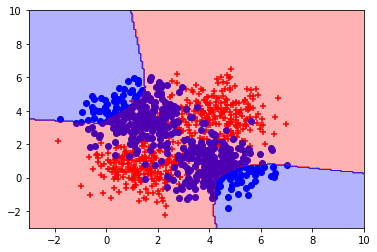

In [23]:
xTrain, yTrain = generate(120, num_classes, [[3.0, 0], [3.0, 3.0], [0, 3.0]], True)
yTrain = yTrain % 2
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

    
nb_of_xs = 200
xs1 = np.linspace(-3, 10, num=nb_of_xs)
xs2 = np.linspace(-3, 10, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 

__增大数据集后，模型改善了过拟合的情况，并且泛化性能进一步提升__